**Position:** Artificial Labs Summer Internship 2021 Data Team

**Name:** Vlad Marascu

**Date:** 26.11.2020

# Project Outline (Table of Contents)

1. Basic dataset analysis
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Model Building and Performance
5. Summary and Chosen Model

# 1. Basic dataset analysis

Importing Python packages:

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing data into a dataframe:

In [129]:
df = pd.read_csv('bank-full.csv', sep=";")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


We have around 45,000 data points in this dataset.

We can observe we have no NaNs (missing values); however there are some 'unknowns' in the contact and poutcome columns specifically. We will treat those as NaNs.

Let's replace the unknowns with the usual NaNs:

In [131]:
df = df.replace('unknown', np.NaN)

Plotting a heatmap of missing values to visualize them in an easier way:

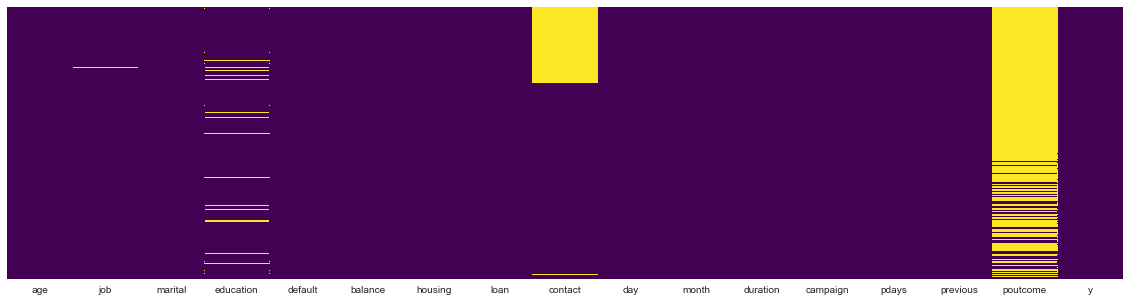

In [132]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Observe that most of the 'poutcome' column is missing and might be related to the value of the 'previous' column being 0 (check the tail of the df above). Therefore we can eliminate this column, as too much of the data is missing, and this column is unusable.

In [133]:
df=df.drop('poutcome', axis=1)

Observe that the first records of the 'contact' column are also missing, this might be due to the fact that the datapoints are ordered chronologically. Let's see how many datapoints we have missing in the remaining columns:

In [134]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
y                0
dtype: int64

The values missing in 'job' and 'education' are negligible compared to the full size of the dataset; however there are a lot of missing points for 'contact'. Since the data type of these columns is **categorical**, we cannot use imputation with the mean, mode or median, a good way to complete these columns would be through another Machine Learning Model. For the purpose of this assignment, I will just remove the NaN values and consider the remaining data points are enough for training the model. This will be done later, as to not skew with the EDA and sample statistics (in the Feature Engineering section).

Some initial statistics about the numerical columns:

In [135]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Observation: The mean age looks to be 41, and mean balance 1362. Observe: there is a huge standard deviation for the balance column.

# 2. Exploratory Data Analysis

**Very important**: checking if the dataset is balanced or not.

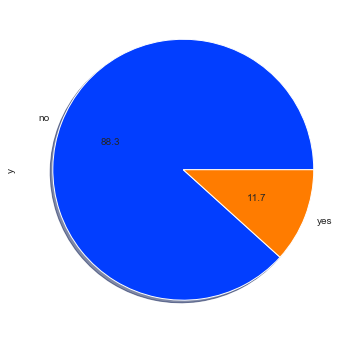

In [136]:
plt.figure(figsize=(6,6))
df['y'].value_counts().plot(kind='pie', autopct='%1.1f', shadow=True)

In [137]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

It looks like we are dealing with an imbalanced dataset, so when measuring performance, we will need to consider precision, recall, F1-Scores and the confusion matrices (accuracy score will not be than relevant in this case).

Obs: Only 5289 (11.7%) people subscribed.

# 2.1 Numerical columns

Preliminary correlation analysis of the numerical columns:

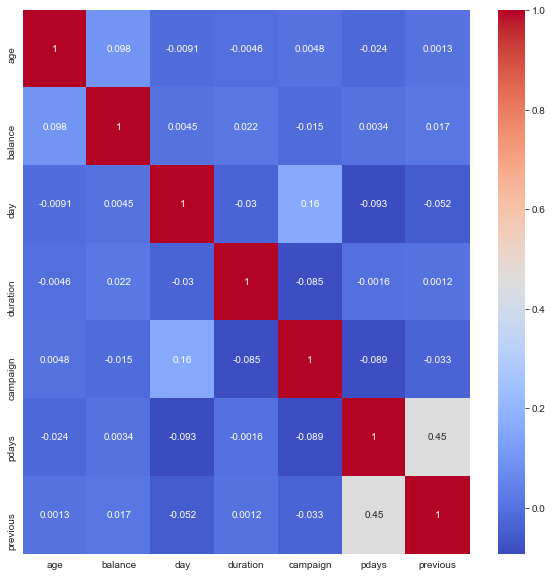

In [138]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

Obs: 'pdays' and 'previous' have a positive correlation, maybe due to the bank's marketing strategy. The rest of the pairs are not correlated it seems.

### Age

Histogram (age distribution):

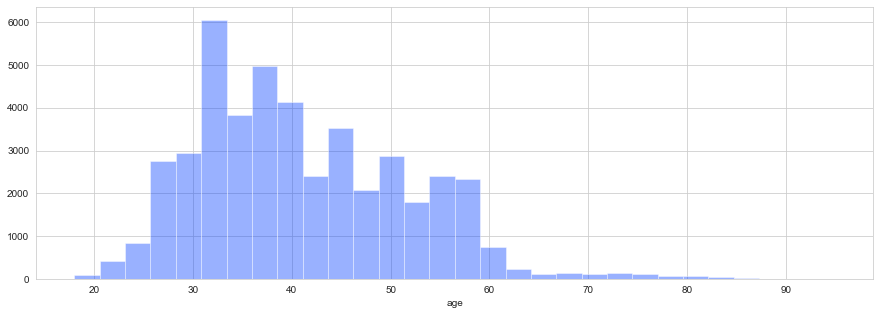

In [139]:
sns.set_style('whitegrid')
sns.set_palette('bright')

plt.figure(figsize=(15,5))
sns.distplot(df['age'].dropna(),kde=False,bins=30)

Normal distribution, leaning towards the younger/mid segment (30-50 years)

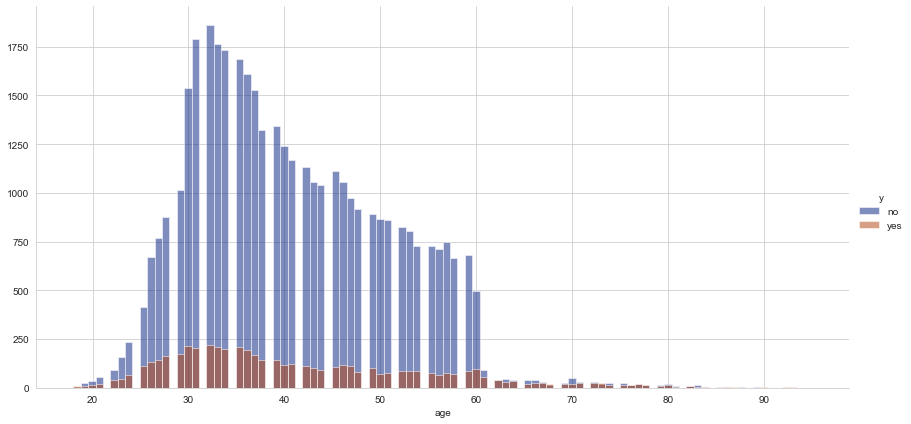

In [140]:
g = sns.FacetGrid(df, hue="y", height=6, aspect=2, palette='dark')
g = g.map(plt.hist, "age", bins=100, alpha=0.5)

g.add_legend()

Looks like age follows a similar distribution when comparing it to the target label, there is however a small trend of older people being more likely to buy the product (in the range of 40-60 the percentage of people buying the subscription is higher, and very high for the 60-90 age band).

## Balance

Histogram of the balance column:

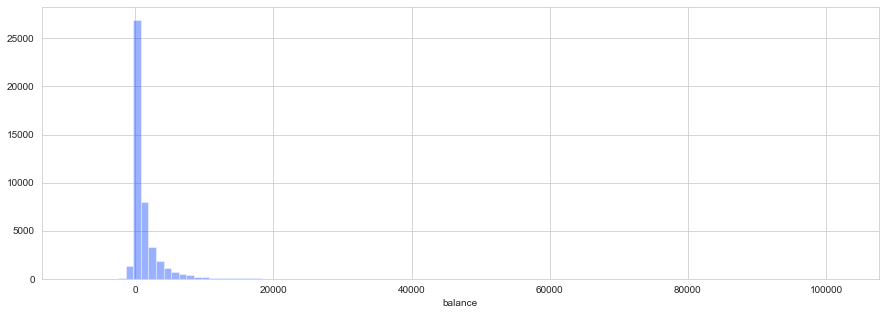

In [141]:
plt.figure(figsize=(15,5))
sns.distplot(df['balance'].dropna(),kde=False,bins=100)

We clearly have some outliers in the range of 100,000.

Is balance a factor when deciding if you are getting the subsription? Maybe richer people tend to subscribe more often.

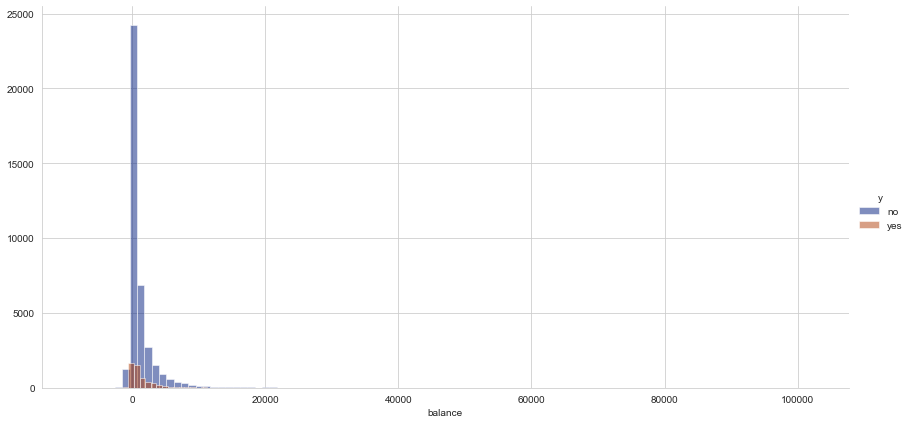

In [142]:
g = sns.FacetGrid(df, hue="y", height=6, aspect=2, palette='dark')
g = g.map(plt.hist, "balance", bins=100, alpha=0.5)

g.add_legend()

The distribution actually looks similar, we can even see that people with negative balance (or close to 0 balance) have subscribed.

## Day

Plotting which days of the month are the most busy for the marketing team in descending order:

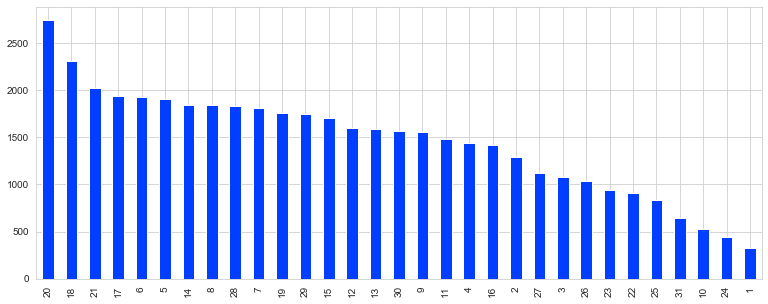

In [143]:
df['day'].value_counts().plot(kind='bar', figsize=(13,5))

Monthly distribution of contact:

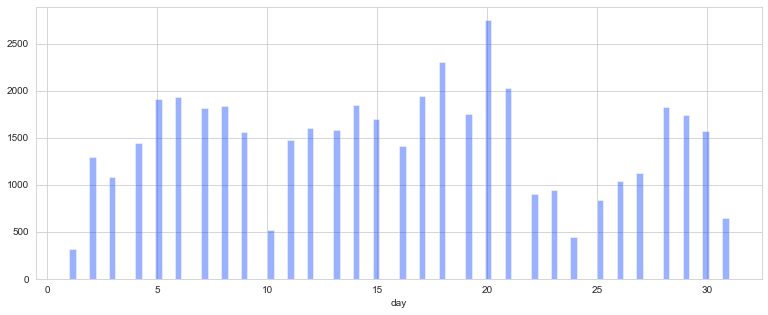

In [144]:
plt.figure(figsize=(13,5))
sns.distplot(df['day'].dropna(),kde=False,bins=100)

## Duration

Duration of contact histogram (if 0 I assumed we are implying no contact at all, if not 0 this value is the phone conversation time):

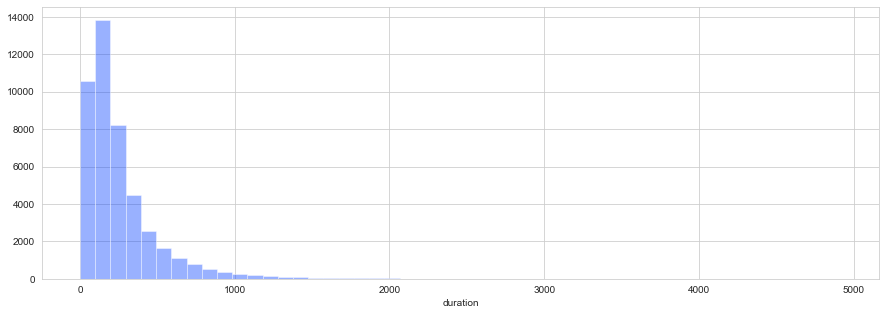

In [145]:
plt.figure(figsize=(15,5))
sns.distplot(df['duration'].dropna(),kde=False,bins=50)

Does this have an effect upon people buying the subscription?

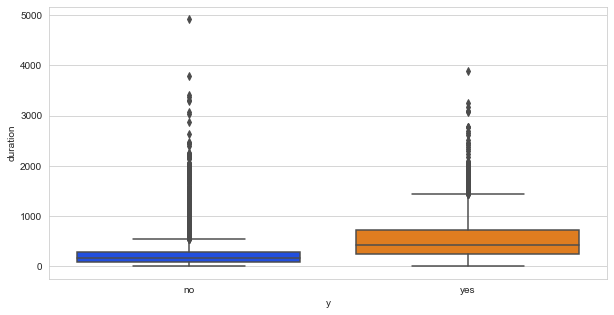

In [146]:
plt.figure(figsize=(10,5))
sns.boxplot(x="y", y="duration", data=df)

Yes, it does, as expected a longer duration of the call leads to the person buying the product.

## Campaign:

Campaign (number of contacts during the campaign period for each person):

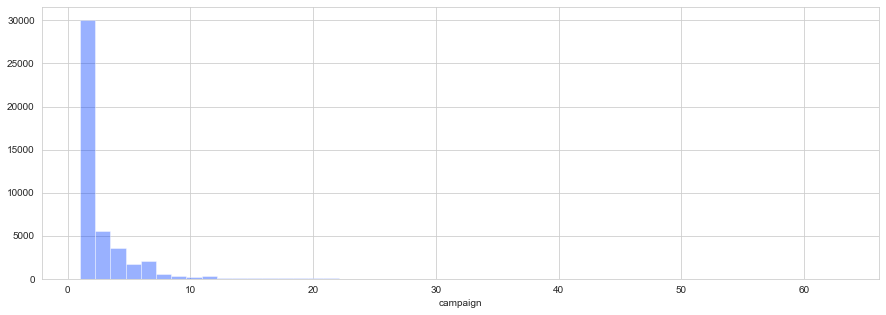

In [147]:
plt.figure(figsize=(15,5))
sns.distplot(df['campaign'].dropna(),kde=False,bins=50)

Similar to duration, does campaign (no of contacts) have an effect of people buying the product?

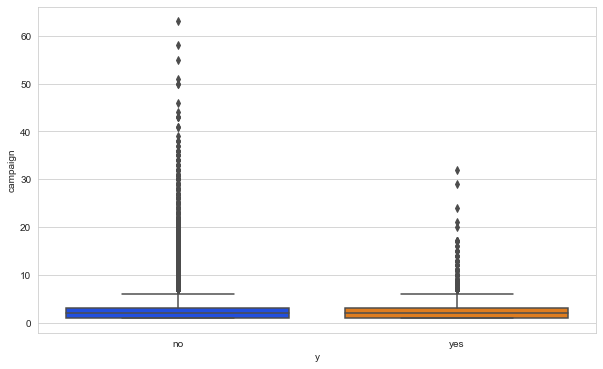

In [148]:
plt.figure(figsize=(10,6))
sns.boxplot(x="y", y="campaign", data=df)

'Campaign' doesn't seem to have a big effect on the outcome. However, the outliers (long campaign/unual large number of contacts) certainly lead to people becoming annoyed and declining the subscription.

## Pdays and Previous:

Do these columns have an impact on the outcome?

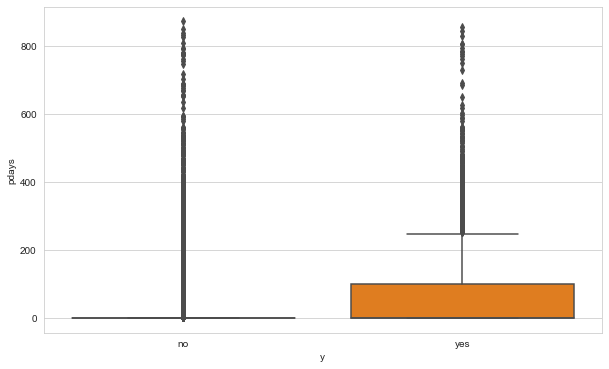

In [149]:
plt.figure(figsize=(10,6))
sns.boxplot(x="y", y="pdays", data=df)

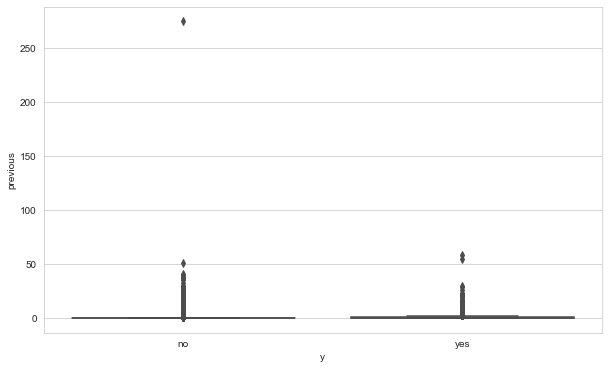

In [150]:
plt.figure(figsize=(10,6))
sns.boxplot(x="y", y="previous", data=df)

Only 'pdays' seems to have a positive correlation to the outcome (i.e. people that were contacted less time ago from the previous campaign seem to be more inclined to buy the product, might indicate that people do not appreciate being disturbed repeatedly by the marketing team).

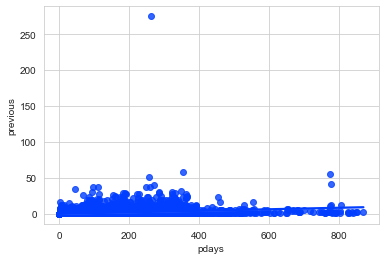

In [151]:
sns.regplot(x='pdays',y='previous', data=df)

These columns have a slight positive correlation, as found in the correlation heatmap above.

# 2.2 Categorical Columns

## Job

Simple counting of the jobs in this dataset:

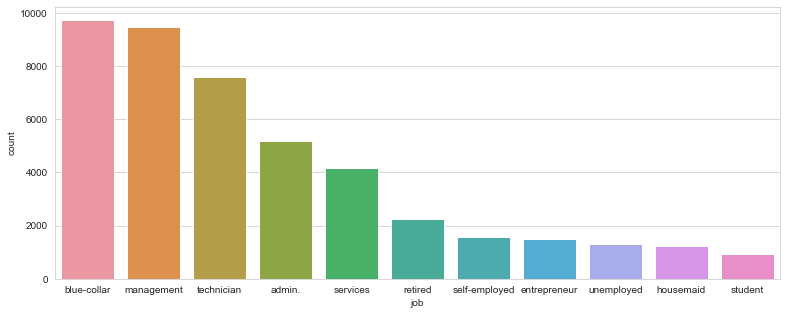

In [152]:
plt.figure(figsize=(13,5))
sns.countplot(x='job',data=df, order = df['job'].value_counts().index)

Top jobs seem to be: blue-collar, management and tehnician. The least targeted segment is students, as expected.

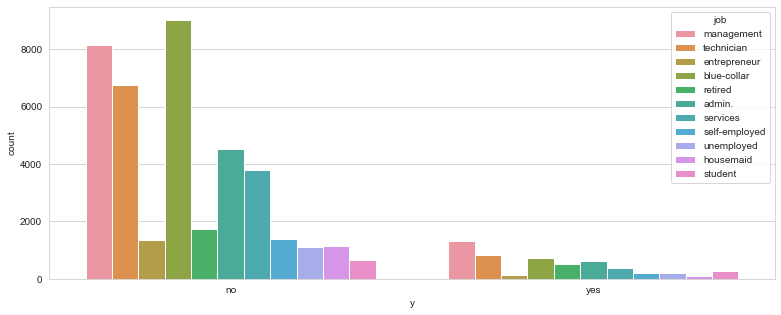

In [153]:
plt.figure(figsize=(13,5))
sns.countplot(x='y',hue='job',data=df)

There is a similar bi-normal distribution for both outcomes, so job is not expected to be a really strong feature.

## Marital

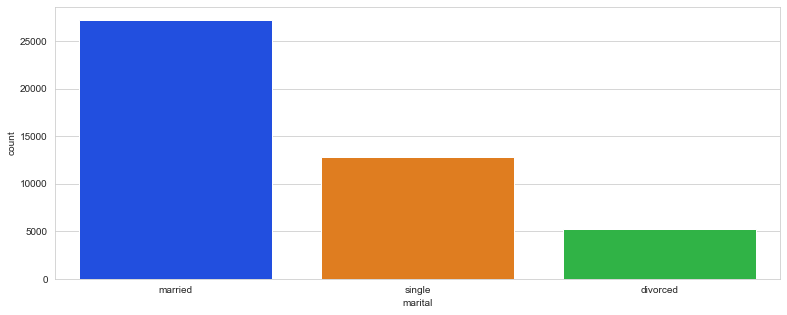

In [154]:
plt.figure(figsize=(13,5))
sns.countplot(x='marital',data=df, order = df['marital'].value_counts().index)

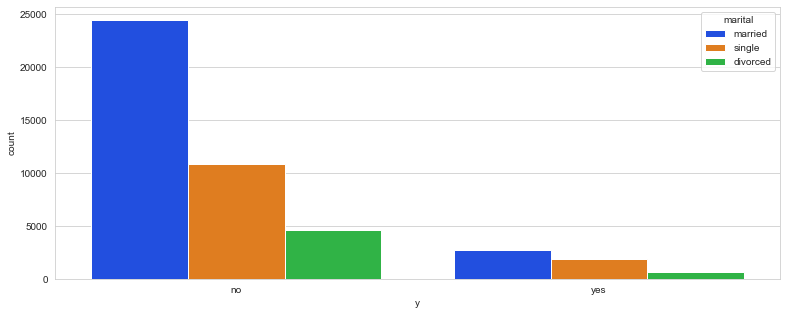

In [155]:
plt.figure(figsize=(13,5))
sns.countplot(x='y',hue='marital',data=df)

Again, similar distribution, but for the 'yes' outcome there is a smaller difference between married and single people that bought the product.

## Education

Counting what education types are the most prelevant in our sample:

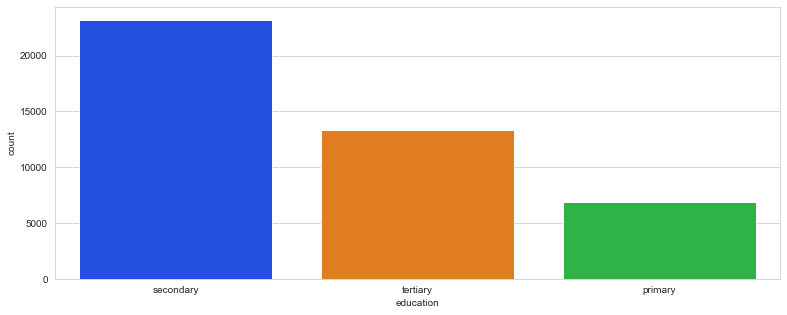

In [156]:
plt.figure(figsize=(13,5))
sns.countplot(x='education',data=df, order = df['education'].value_counts().index)

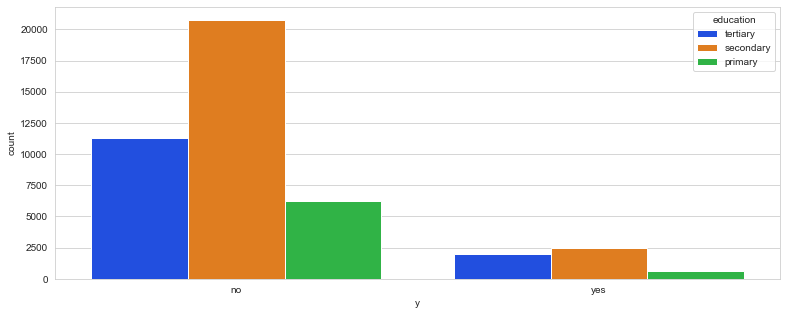

In [157]:
plt.figure(figsize=(13,5))
sns.countplot(x='y',hue='education',data=df)

Similar distribution, with a lesser gap between tertiary and secondary for the 'yes' column.

## Default, Housing, Loan

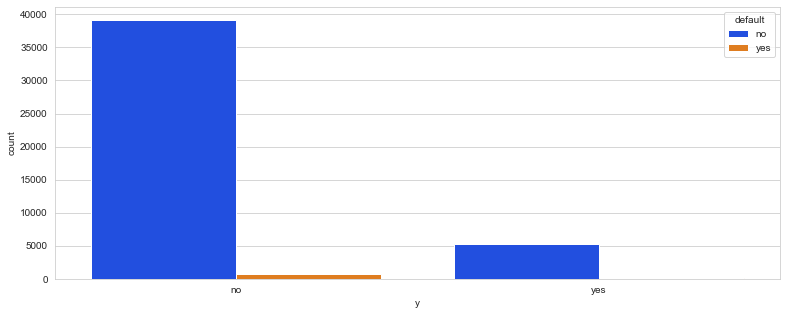

In [158]:
plt.figure(figsize=(13,5))
sns.countplot(x='y',hue='default',data=df)

We can observe that people who have credit in default have not bought the product at all, probably due to lower financial stability.

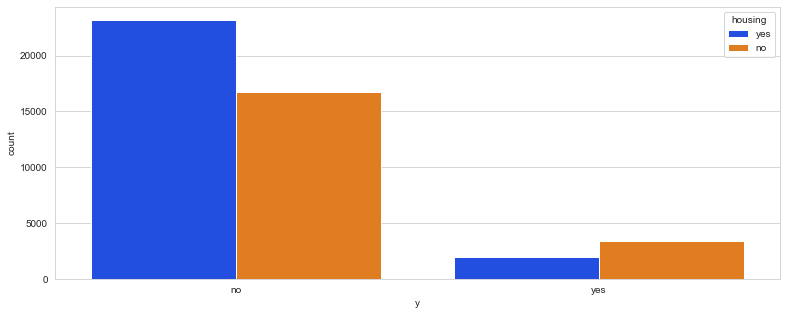

In [159]:
plt.figure(figsize=(13,5))
sns.countplot(x='y',hue='housing',data=df)

Here we have something expected: people that bought the subscription are more likely to not have a housing loan (as expected).

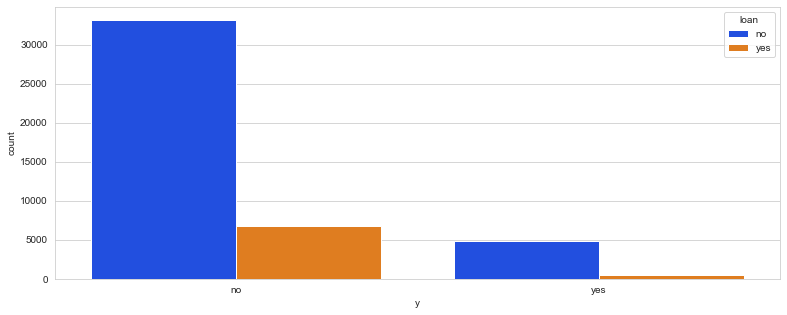

In [160]:
plt.figure(figsize=(13,5))
sns.countplot(x='y',hue='loan',data=df)

Again, exactly the same trend, people with loans are less likely to buy the subscription.

## Contact

What are the most used means of contact from the marketing team and their effect on convincing customers:

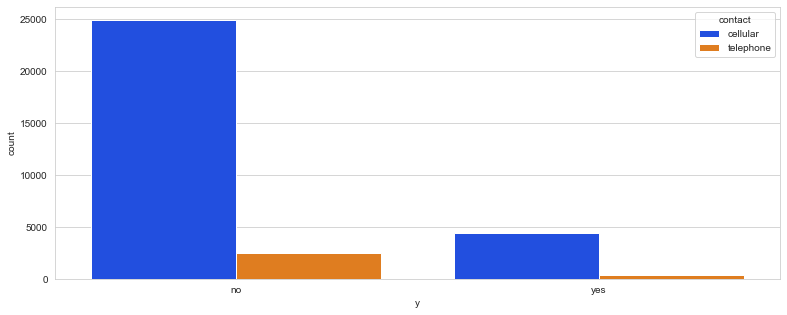

In [161]:
plt.figure(figsize=(13,5))
sns.countplot(x='y',hue='contact',data=df)

We can observe that most of the people that bought the product were contacted on cellular, but the same trend holds true for the people who did not buy the product. 

## Month

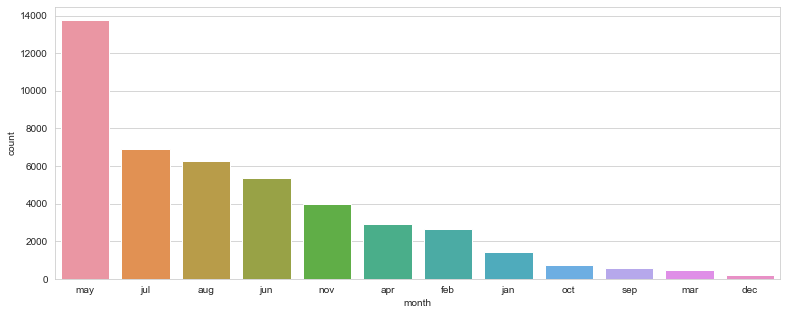

In [162]:
plt.figure(figsize=(13,5))
sns.countplot(df['month'].dropna(), order = df['month'].value_counts().index)

The data is not distributed evenly regarding the months, looks like a lot of data came from May, and less from December, October, Sept and March. December could be a useful month to look at, considering that people might have saved some money for the festive season.

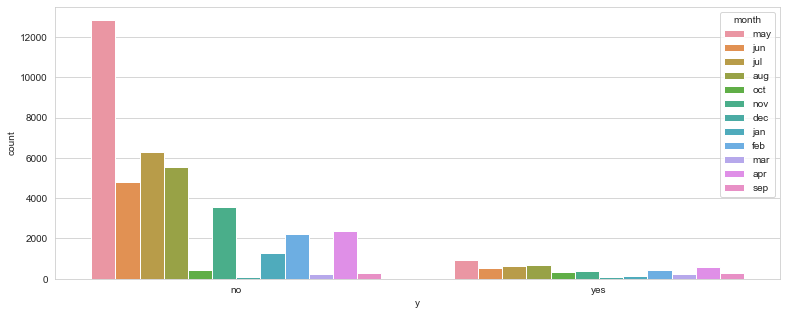

In [163]:
plt.figure(figsize=(13,5))
sns.countplot(x='y',hue='month',data=df)

Looks like December has around 50% success rate, and the months that are less represented (mentioned above) have better success rates. Inversely, the well-represented months have low rates of success for customers.

# 3. Feature Engineering

In this section I will prepare the data for the model fitting.

Let's drop the NaN values in the dataframe:

In [164]:
df = df.dropna()

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30907 entries, 12657 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        30907 non-null  int64 
 1   job        30907 non-null  object
 2   marital    30907 non-null  object
 3   education  30907 non-null  object
 4   default    30907 non-null  object
 5   balance    30907 non-null  int64 
 6   housing    30907 non-null  object
 7   loan       30907 non-null  object
 8   contact    30907 non-null  object
 9   day        30907 non-null  int64 
 10  month      30907 non-null  object
 11  duration   30907 non-null  int64 
 12  campaign   30907 non-null  int64 
 13  pdays      30907 non-null  int64 
 14  previous   30907 non-null  int64 
 15  y          30907 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


We still have almost 31,000 rows of data!

I will convert the categorical columns into numerical ones, and in order to ensure the results are unskewed, I will use Dummy Variables instead of LabelEncoder. Note that I will drop the first column of each dummy variable, as it is not needed.

In [166]:
job = pd.get_dummies(df['job'],prefix='job',drop_first=True)

In [167]:
df=df.drop('job', axis=1)

In [168]:
job

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
12657,0,0,0,1,0,0,0,0,0,0
12658,1,0,0,0,0,0,0,0,0,0
12659,1,0,0,0,0,0,0,0,0,0
12660,0,0,0,0,0,0,0,0,1,0
12661,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,1,0
45207,0,0,0,0,1,0,0,0,0,0
45208,0,0,0,0,1,0,0,0,0,0
45209,1,0,0,0,0,0,0,0,0,0


In [169]:
df = pd.concat([df,job],axis=1)

In [170]:
df

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
12657,27,single,secondary,no,35,no,no,cellular,4,jul,...,0,0,0,1,0,0,0,0,0,0
12658,54,married,primary,no,466,no,no,cellular,4,jul,...,1,0,0,0,0,0,0,0,0,0
12659,43,married,secondary,no,105,no,yes,cellular,4,jul,...,1,0,0,0,0,0,0,0,0,0
12660,31,single,secondary,no,19,no,no,telephone,4,jul,...,0,0,0,0,0,0,0,0,1,0
12661,27,single,secondary,no,126,yes,yes,cellular,4,jul,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,no,825,no,no,cellular,17,nov,...,0,0,0,0,0,0,0,0,1,0
45207,71,divorced,primary,no,1729,no,no,cellular,17,nov,...,0,0,0,0,1,0,0,0,0,0
45208,72,married,secondary,no,5715,no,no,cellular,17,nov,...,0,0,0,0,1,0,0,0,0,0
45209,57,married,secondary,no,668,no,no,telephone,17,nov,...,1,0,0,0,0,0,0,0,0,0


This worked, so we will repeat it for all the categorical columns:

In [171]:
marital = pd.get_dummies(df['marital'],prefix='marital',drop_first=True)
education = pd.get_dummies(df['education'],prefix='education',drop_first=True)
default = pd.get_dummies(df['default'],prefix='default',drop_first=True)
housing = pd.get_dummies(df['housing'],prefix='housing',drop_first=True)
loan = pd.get_dummies(df['loan'],prefix='loan',drop_first=True)
contact = pd.get_dummies(df['contact'],prefix='contact',drop_first=True)
month = pd.get_dummies(df['month'],prefix='month',drop_first=True)

In [172]:
df=df.drop(['marital','education','default','housing','loan','contact','month'], axis=1)

In [173]:
df = pd.concat([df,marital,education,default,housing,loan,contact,month],axis=1)

In [174]:
df

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
12657,27,35,4,255,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,0
12658,54,466,4,297,1,-1,0,no,1,0,...,0,0,0,1,0,0,0,0,0,0
12659,43,105,4,668,2,-1,0,no,1,0,...,0,0,0,1,0,0,0,0,0,0
12660,31,19,4,65,2,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,0
12661,27,126,4,436,4,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,yes,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,1729,17,456,2,-1,0,yes,0,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,5715,17,1127,5,184,3,yes,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,57,668,17,508,4,-1,0,no,1,0,...,0,0,0,0,0,0,0,1,0,0


Repeating the process for the target label 'y':

In [175]:
y = pd.get_dummies(df['y'],prefix='target',drop_first=True)

In [176]:
df=df.drop('y', axis=1)

In [177]:
df = pd.concat([df,y],axis=1)

In [178]:
df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,target_yes
12657,27,35,4,255,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12658,54,466,4,297,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
12659,43,105,4,668,2,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
12660,31,19,4,65,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12661,27,126,4,436,4,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


We can see we have no more categorical variables, only numberical, meaning our dataset is ready for fitting.

**Target label**: 'target_yes'

# 4. Models and Performance

Separating features from label 'target_yes':

In [179]:
X=df.drop(['target_yes'], axis=1)
y=df['target_yes']

Standardizing the features for better performance in some of the employed models (such as KNN where distance matters). Note that some features that are expected to be important might be affected by this (i.e. duration).

In [180]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_std=scaler.transform(X) # numpy array here

#Create new X dataframe
X_scaled=pd.DataFrame(X_std, columns=df.drop('target_yes',axis=1).columns)
X_scaled.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,-1.274345,-0.435850,-1.454702,-0.021278,-0.592790,-0.505165,-0.298763,-0.467069,-0.182763,-0.169988,...,-0.080093,-0.297948,-0.2103,1.969264,-0.160269,-0.120313,-0.470663,-0.374076,-0.145646,-0.126659
1,1.197637,-0.300779,-1.454702,0.141652,-0.592790,-0.505165,-0.298763,2.141009,-0.182763,-0.169988,...,-0.080093,-0.297948,-0.2103,1.969264,-0.160269,-0.120313,-0.470663,-0.374076,-0.145646,-0.126659
2,0.190533,-0.413913,-1.454702,1.580865,-0.254308,-0.505165,-0.298763,2.141009,-0.182763,-0.169988,...,-0.080093,-0.297948,-0.2103,1.969264,-0.160269,-0.120313,-0.470663,-0.374076,-0.145646,-0.126659
3,-0.908126,-0.440864,-1.454702,-0.758341,-0.254308,-0.505165,-0.298763,-0.467069,-0.182763,-0.169988,...,-0.080093,-0.297948,-0.2103,1.969264,-0.160269,-0.120313,-0.470663,-0.374076,-0.145646,-0.126659
4,-1.274345,-0.407332,-1.454702,0.680872,0.422657,-0.505165,-0.298763,-0.467069,-0.182763,-0.169988,...,-0.080093,-0.297948,-0.2103,1.969264,-0.160269,-0.120313,-0.470663,-0.374076,-0.145646,-0.126659


Freature selection (added later): I removed the worst performing columns based on the feature importance provided by LOG REG (see in Section 4.1)

In [181]:
X_scaled=X_scaled.drop(['education_secondary',
 'job_entrepreneur',
 'month_dec',
 'marital_single',
 'contact_telephone',
 'job_housemaid',
 'job_retired',
 'job_technician',
 'job_student',
 'job_management',
 'default_yes',
 'day',
 'job_services',
 'month_feb',
 'balance',
 'job_self-employed',
 'age',
 'marital_married',
 'job_unemployed'], axis=1)

In [182]:
X_scaled

,duration,campaign,pdays,previous,job_blue-collar,education_tertiary,housing_yes,loan_yes,month_aug,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,-0.021278,-0.592790,-0.505165,-0.298763,-0.467069,-0.724615,-0.992875,-0.445589,-0.490152,-0.2103,1.969264,-0.160269,-0.120313,-0.470663,-0.374076,-0.145646,-0.126659
1,0.141652,-0.592790,-0.505165,-0.298763,2.141009,-0.724615,-0.992875,-0.445589,-0.490152,-0.2103,1.969264,-0.160269,-0.120313,-0.470663,-0.374076,-0.145646,-0.126659
2,1.580865,-0.254308,-0.505165,-0.298763,2.141009,-0.724615,-0.992875,2.244220,-0.490152,-0.2103,1.969264,-0.160269,-0.120313,-0.470663,-0.374076,-0.145646,-0.126659
3,-0.758341,-0.254308,-0.505165,-0.298763,-0.467069,-0.724615,-0.992875,-0.445589,-0.490152,-0.2103,1.969264,-0.160269,-0.120313,-0.470663,-0.374076,-0.145646,-0.126659
4,0.680872,0.422657,-0.505165,-0.298763,-0.467069,-0.724615,1.007176,2.244220,-0.490152,-0.2103,1.969264,-0.160269,-0.120313,-0.470663,-0.374076,-0.145646,-0.126659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,2.779562,0.084174,-0.505165,-0.298763,-0.467069,1.380044,-0.992875,-0.445589,-0.490152,-0.2103,-0.507804,-0.160269,-0.120313,-0.470663,2.673253,-0.145646,-0.126659
30903,0.758457,-0.254308,-0.505165,-0.298763,-0.467069,-0.724615,-0.992875,-0.445589,-0.490152,-0.2103,-0.507804,-0.160269,-0.120313,-0.470663,2.673253,-0.145646,-0.126659
30904,3.361454,0.761139,1.135995,0.809833,-0.467069,-0.724615,-0.992875,-0.445589,-0.490152,-0.2103,-0.507804,-0.160269,-0.120313,-0.470663,2.673253,-0.145646,-0.126659
30905,0.960180,0.422657,-0.505165,-0.298763,2.141009,-0.724615,-0.992875,-0.445589,-0.490152,-0.2103,-0.507804,-0.160269,-0.120313,-0.470663,2.673253,-0.145646,-0.126659


Train-test split on our scaled data:

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=1)

**Predefine performance metric functions for Classification Problems**

In [184]:
def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    f1_sc = f1_score(y_true, y_pred)*100
    acc_sc = accuracy_score(y_true, y_pred)*100
    print("F1 Score : "+ str(f1_sc))
    print("Accuracy Score : "+ str(acc_sc))

In [185]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", cbar=False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [186]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

## 4.1 Logistic Regression

In [187]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(class_weight="balanced", max_iter=10000) # balanced class weight to mitigate for the imbalanced label
lr.fit(X_train,y_train)
p1=lr.predict(X_test)
s1=accuracy_score(y_test,p1)
print("Logistic Regression Accuracy Score :", s1*100,'%')

Logistic Regression Accuracy Score : 81.16666666666667 %


In [188]:
print_validation_report(y_test,p1)

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      8735
           1       0.42      0.77      0.54      1465

    accuracy                           0.81     10200
   macro avg       0.69      0.80      0.71     10200
weighted avg       0.88      0.81      0.83     10200

F1 Score : 54.16368408494393
Accuracy Score : 81.16666666666667


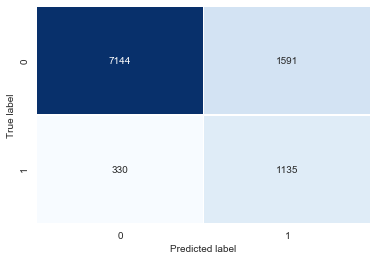

In [189]:
plot_confusion_matrix(y_test,p1)

**Feature importance in Log Regression**:

Initially, I ran the model with all the features, and then I used this part in order to select the best-performing features only (see Section 3. Feature Selection above).

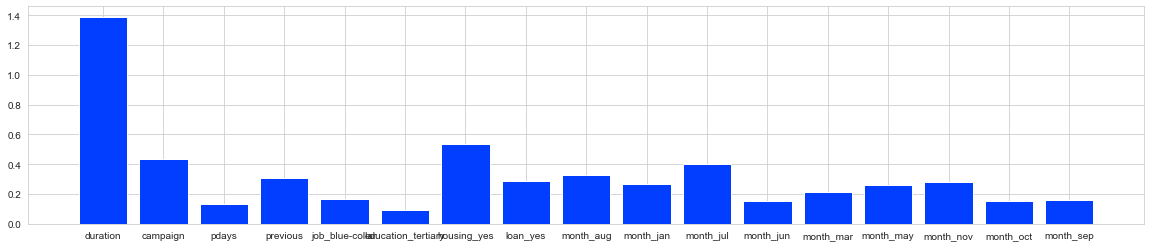

In [190]:
importance = abs(lr.coef_[0])
coeffecients = pd.DataFrame(importance, X_train.columns)
coeffecients.columns = ['Coeffecient']
plt.figure(figsize=(20,4))
plt.bar(X_train.columns,importance)
plt.show()

Most important features in order:

In [191]:
coeffecients.sort_values(by='Coeffecient', ascending=False)

,Coeffecient
duration,1.390941
housing_yes,0.536569
campaign,0.438099
month_jul,0.403311
month_aug,0.329234
previous,0.309622
loan_yes,0.290382
month_nov,0.281142
month_jan,0.263980
month_may,0.261824


Extracting the least important features, I will remove them from the feature list above to see if our F1 score improves.

# 4.2 Random Forest

In [192]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(class_weight="balanced")
rfc.fit(X_train,y_train)
p2=rfc.predict(X_test)
s2=accuracy_score(y_test,p2)
print("Random Forrest Accuracy :", s2*100,'%')

Random Forrest Accuracy : 86.09803921568627 %


In [193]:
print_validation_report(y_test,p2)

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      8735
           1       0.52      0.45      0.48      1465

    accuracy                           0.86     10200
   macro avg       0.71      0.69      0.70     10200
weighted avg       0.85      0.86      0.86     10200

F1 Score : 48.21037253469686
Accuracy Score : 86.09803921568627


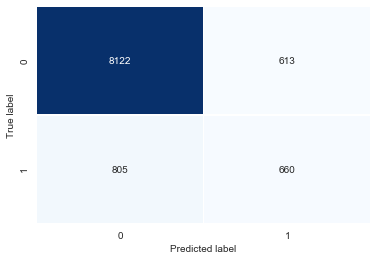

In [194]:
plot_confusion_matrix(y_test,p2)

# 4.3 SVM

In [195]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
p3=svm.predict(X_test)
s3=accuracy_score(y_test,p3)
print("SVM Accuracy :", s3*100,'%')

SVM Accuracy : 87.25490196078431 %


In [196]:
print_validation_report(y_test,p3)

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      8735
           1       0.63      0.27      0.38      1465

    accuracy                           0.87     10200
   macro avg       0.76      0.62      0.66     10200
weighted avg       0.85      0.87      0.85     10200

F1 Score : 38.21292775665399
Accuracy Score : 87.25490196078431


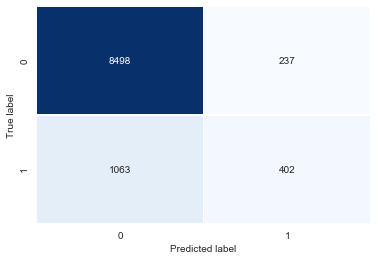

In [197]:
plot_confusion_matrix(y_test,p3)

**Hyper-parameter tuning of the SVM Classifier using GridSearchCV:** (ran it only once due to long computational time)

Use class_weight=balanced, C = 1 (default) and gamma = 0.0001 and retrain the model:

In [198]:
from sklearn.svm import SVC
svm=SVC(class_weight="balanced",gamma=0.0001)
svm.fit(X_train,y_train)
p3=svm.predict(X_test)
s3=accuracy_score(y_test,p3)
print("SVM Accuracy :", s3*100,'%')

SVM Accuracy : 84.00980392156863 %


In [199]:
print_validation_report(y_test,p3)

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      8735
           1       0.46      0.70      0.56      1465

    accuracy                           0.84     10200
   macro avg       0.70      0.78      0.73     10200
weighted avg       0.88      0.84      0.85     10200

F1 Score : 55.69138820972562
Accuracy Score : 84.00980392156863


The accuracy score decreased, but the F1 Score improved a lot, so the hyper-parameter tuning worked well overall.

# 4.4 KNN

In [200]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
p4=knn.predict(X_test)
s4=accuracy_score(y_test,p4)
print("KNN Accuracy :", s4*100,'%')

KNN Accuracy : 86.90196078431373 %


**Optimize for the best value of K** (only ran it once due to long time of processing):

Retrain for **K=16** neighbours, found this to minimise error rate and maximise the accuracy score:

In [201]:
knn=KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)
p4=knn.predict(X_test)
s4=accuracy_score(y_test,p4)
print("KNN Accuracy :", s4*100,'%')

KNN Accuracy : 86.9607843137255 %


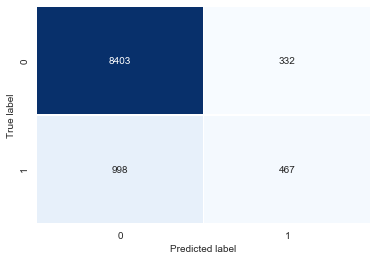

In [202]:
plot_confusion_matrix(y_test,p4)

In [203]:
print_validation_report(y_test,p4)

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      8735
           1       0.58      0.32      0.41      1465

    accuracy                           0.87     10200
   macro avg       0.74      0.64      0.67     10200
weighted avg       0.85      0.87      0.85     10200

F1 Score : 41.254416961130744
Accuracy Score : 86.9607843137255


# 4.5 Gaussian Naive-Bayes

In [204]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
p5 =nb.predict(X_test)
s5=accuracy_score(y_test,p5)
print("Naive-Bayes Accuracy:", s5*100,'%')

Naive-Bayes Accuracy: 85.35294117647058 %


In [205]:
print_validation_report(y_test,p5)

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      8735
           1       0.49      0.35      0.40      1465

    accuracy                           0.85     10200
   macro avg       0.69      0.64      0.66     10200
weighted avg       0.84      0.85      0.84     10200

F1 Score : 40.3830806065443
Accuracy Score : 85.35294117647058


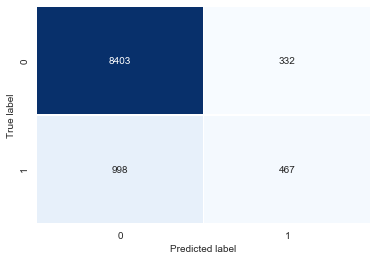

In [206]:
plot_confusion_matrix(y_test,p4)

# Performance Comparison:

**Accuracy comparison** (not entirely relevant, as our dataset is imbalanced towards class '0', the models have trouble with predictions associated with class '1', as seen from the confusion matrices):

In [207]:
models = pd.DataFrame({
    'Model': ["LOGISTIC REGRESSION","RANDOM FOREST","SUPPORT VECTOR MACHINE","KNN","NAIVE-BAYES"],
    'Accuracy Score': [s1*100,s2*100,s3*100,s4*100,s5*100]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
3,KNN,86.960784
1,RANDOM FOREST,86.098039
4,NAIVE-BAYES,85.352941
2,SUPPORT VECTOR MACHINE,84.009804
0,LOGISTIC REGRESSION,81.166667


**F1-Score Comparison** (relevant, as this metric is a combination of both precision and recall):

In [208]:
print("LOGISTIC REGRESSION : ",f1_score(y_test,p1))
print("RANDOM FOREST : ",f1_score(y_test,p2))
print("SUPPORT VECTOR MACHINE : ",f1_score(y_test,p3))
print("KNN : ",f1_score(y_test,p4))
print("NAIVE-BAYES : ",f1_score(y_test,p5))

LOGISTIC REGRESSION :  0.5416368408494393
RANDOM FOREST :  0.4821037253469686
SUPPORT VECTOR MACHINE :  0.5569138820972562
KNN :  0.4125441696113074
NAIVE-BAYES :  0.40383080606544297


There are 2 clear winners in this comparison:

- LOG REG (0.54)
- SVM (0.56)

**ROC curves and AUC scores Comparison** for each model:

<the bigger the area under the ROC (FP rate vs TP rate) curve, the better the performance>

In [209]:
from sklearn.metrics import roc_curve,roc_auc_score, auc

In [210]:
fpr1,tpr1, thr1=roc_curve(y_test,p1)
fpr2,tpr2, thr2=roc_curve(y_test,p2)
fpr3,tpr3, thr3=roc_curve(y_test,p3)
fpr4,tpr4, thr4=roc_curve(y_test,p4)
fpr5,tpr5, thr5=roc_curve(y_test,p5)

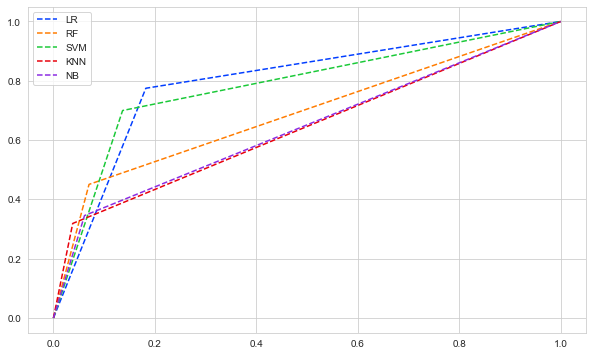

In [211]:
plt.figure(figsize=(10,6))
plt.plot(fpr1,tpr1, linestyle='--', label='LR')
plt.plot(fpr2,tpr2, linestyle='--', label='RF')
plt.plot(fpr3,tpr3, linestyle='--', label='SVM')
plt.plot(fpr4,tpr4, linestyle='--', label='KNN')
plt.plot(fpr5,tpr5, linestyle='--', label='NB')
plt.legend()

In [212]:
print("LOGISTIC REGRESSION : ",roc_auc_score(y_test,p1))
print("RANDOM FOREST : ",roc_auc_score(y_test,p2))
print("SUPPORT VECTOR MACHINE : ",roc_auc_score(y_test,p3))
print("KNN : ",roc_auc_score(y_test,p4))
print("NAIVE-BAYES : ",roc_auc_score(y_test,p5))

LOGISTIC REGRESSION :  0.7963016072408868
RANDOM FOREST :  0.6901672491702011
SUPPORT VECTOR MACHINE :  0.7816553389428196
KNN :  0.6403816586600921
NAIVE-BAYES :  0.6420723190022486


Both from the plot above, representing the ROC curve for each model, and the ROC-AUC Scores, there are 2 stand-out models:

- LOG REG (0.8)
- SVM (0.78)

# 5. Summary and Chosen Model

Since we are dealing with imbalanced classes, it is vital to not only consider accuracy as a metric, but also precision and recall, which are combined in the F1-score. Moreover, we have compared the models' ROC curves and ROC-AUC scores too, for a more comprehensive comparison.  

Therefore, 2 models stood out both in F1-Score and ROC-AUC score:

- LOG REG (balanced class weights to ensure the model is aware of the label imbalance)
- SVM (balanced class weights, gamma=0.0001 optimized with GridSearch)

To compare the 2 models, we can have a look at their confusion matrices:

- LOG REG: has a high number of FP (false positive), meaning that people that were actually not interested in the product were predicted as potential customers
- SVM: has a high number of FN (false negatives), meaning that people that have actually bought the service were predicted as a negative signal

Business-wise, the approach that makes most sense for me would be to go for the **LOG REG** model that has a lot of False Positives, send the marketing campaign to as many users as possible and in the worst case, people who were not actually interested in the product will just decline the offer.

Model-wise, the approach that has the best combination of Accuracy and F1-Score is the **SVM Classifier**, as it produces less overall errors than the LOGREG, as seen from their confusion matrices.

## Feature importance in the marketing decisions:

We have seen that some features have a bigger effect on the prediction than others, and the top 3 features were:

- duration
- housing
- campaign

It is clear that the **duration** of the last call is a very important factor in the people's decision, and this feature is scalable with it's value in minutes (the longer the call, the more likely the customer will buy the product). We have observed this in the EDA section as well, confirming the model extracted this feature importance well enough.

**Housing** also plays an important role in this predictive model, as we have shown both in EDA and Model Building that people that have housing loans are less likely to be interested in the offer and people that don't have any loans (maybe they are most financially stable) are more likely to buy the subscription.

**Campaign** (or number of contacts in the campaign period) is the third most important feature in our cleaned dataset. Although this feature was not observed to be as important during EDA, there were clear outliers in the 'campaign' column. To further engineer this feature, the outliers (top 1% of the datapoints in this column) could have been eliminated. However, it makes sense that most outliers (large number of contacts) lead to people being annoyed and declining the offer, but a moderate ammount of contact lead to people buying the subscription.

## Mentions:
- The dataset was unequally split for the given months, and this lead to the month column(s) to have a bigger impact on the results than expected
- Some fetures like **education, job, marital status and age** had no real impact, and, as predicted by our EDA, these features ended up being removed from the training dataset
- **Further improvements**: more feature engineering (i.e. creating uniformly-distributed bands/groups for age, balance, campaign and duration for better model fitting), using **undersampling** methods to deal with the imbalanced target labels